# Search stocks

In [19]:
import pandas as pd
from pandas import DataFrame
import json
from pandas_datareader import data as pdr
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
yf.pdr_override()


In [20]:
df = pd.read_html('https://en.wikipedia.org/wiki/E-mini')[0]
tickers = df['Ticker symbol'].values.tolist()
tickers

['ES',
 'MES',
 'EME',
 'YM',
 'MYM',
 'EMD',
 'SMC',
 'NQ',
 'MNQ',
 'QCN',
 'BIO',
 'EMF',
 'FXN',
 'J7',
 'E7',
 'XAY',
 'XAP',
 'XAF',
 'XAV',
 'XAI',
 'XAB',
 'XAK',
 'XAU',
 'YC',
 'YK',
 'YW',
 'QM',
 'QG',
 'QH',
 'QU',
 'QO',
 '6Q',
 'QC',
 'RF',
 'TF',
 'M2K']

In [21]:
#f = ES,NQ,YM,TF,6A,6B,6C,6E,6J,6N,DX,6S,CL,QM,NG,HO,GC,YG,SI,YI,HG,PL,6A,ACD,AJY,ANE,6L,6B,PJY,PSF,MP,6C,CJY,6E,EC,E7,EAD,RP,RY,RF,6J,J7,KRW,6M,MP,6N,NOK,6R,6Z,SEK,6S,SJY,DX,CL,BZ,EH,HO,NN,NG,RB,UX,CB,CC,CJ,KC,KT,TT,CT,DY,LB,LBS,DC,GDK,GNF,OJ,YO,SB,SF


futures = [
"ES",
"YM",
"NQ",
"RTY",
"ZB",
"ZN",
"ZF",
"ZT",
"GC",
"MGC",
"SI",
"SIL",
"PL",
"HG",
"PA",
"CL",
"HO",
"NG",
"RB",
"BZ",
"B0",
"ZC",
"ZO",
"KE",
"ZR",
"ZM",
"ZL",
"ZS",
"GF",
"HE",
"LE",
"CC",
"KC",
"CT",
"LBS",
"OJ",
"SB",
"VX"
]
futures = set(map(lambda x: x + '=F', futures + tickers))

ma_count = 21

futures


{'6Q=F',
 'B0=F',
 'BIO=F',
 'BZ=F',
 'CC=F',
 'CL=F',
 'CT=F',
 'E7=F',
 'EMD=F',
 'EME=F',
 'EMF=F',
 'ES=F',
 'FXN=F',
 'GC=F',
 'GF=F',
 'HE=F',
 'HG=F',
 'HO=F',
 'J7=F',
 'KC=F',
 'KE=F',
 'LBS=F',
 'LE=F',
 'M2K=F',
 'MES=F',
 'MGC=F',
 'MNQ=F',
 'MYM=F',
 'NG=F',
 'NQ=F',
 'OJ=F',
 'PA=F',
 'PL=F',
 'QC=F',
 'QCN=F',
 'QG=F',
 'QH=F',
 'QM=F',
 'QO=F',
 'QU=F',
 'RB=F',
 'RF=F',
 'RTY=F',
 'SB=F',
 'SI=F',
 'SIL=F',
 'SMC=F',
 'TF=F',
 'VX=F',
 'XAB=F',
 'XAF=F',
 'XAI=F',
 'XAK=F',
 'XAP=F',
 'XAU=F',
 'XAV=F',
 'XAY=F',
 'YC=F',
 'YK=F',
 'YM=F',
 'YW=F',
 'ZB=F',
 'ZC=F',
 'ZF=F',
 'ZL=F',
 'ZM=F',
 'ZN=F',
 'ZO=F',
 'ZR=F',
 'ZS=F',
 'ZT=F'}

In [22]:
data = pdr.get_data_yahoo(futures, start=dt.datetime(2021,1,1), end=dt.date.today())['Close']
data.tail()


[*********************100%***********************]  71 of 71 completed

17 Failed downloads:
- FXN=F: No data found, symbol may be delisted
- B0=F: No data found for this date range, symbol may be delisted
- EME=F: No data found, symbol may be delisted
- YW=F: No data found for this date range, symbol may be delisted
- YK=F: No data found for this date range, symbol may be delisted
- OJ=F: No data found for this date range, symbol may be delisted
- EMD=F: No data found for this date range, symbol may be delisted
- SMC=F: No data found, symbol may be delisted
- J7=F: No data found for this date range, symbol may be delisted
- EMF=F: No data found, symbol may be delisted
- E7=F: No data found for this date range, symbol may be delisted
- TF=F: No data found, symbol may be delisted
- 6Q=F: No data found, symbol may be delisted
- YC=F: No data found for this date range, symbol may be delisted
- QCN=F: No data found, symbol may be delisted
- VX=F: No data found, symbol may be delisted
- XAY

,6Q=F,B0=F,BIO=F,BZ=F,CC=F,CL=F,CT=F,E7=F,EMD=F,EME=F,...,ZB=F,ZC=F,ZF=F,ZL=F,ZM=F,ZN=F,ZO=F,ZR=F,ZS=F,ZT=F
Date,,,,,,,,,,,,,,,,,,,,,
2021-07-21 00:00:00,NaN,NaN,5150.299805,72.230003,2265.0,70.300003,89.089996,NaN,NaN,NaN,...,164.03125,571.75,124.210938,65.459999,369.799988,134.109375,454.75,1331.0,1439.25,110.261719
2021-07-22 00:00:00,NaN,NaN,5139.700195,73.790001,2317.0,71.910004,90.269997,NaN,NaN,NaN,...,164.50000,564.50,124.320312,65.000000,363.200012,134.250000,454.50,1354.0,1416.25,110.277344
2021-07-23 00:00:00,NaN,NaN,5178.899902,74.099998,2321.0,72.070000,90.320000,NaN,NaN,NaN,...,164.03125,547.25,124.289062,65.660004,353.600006,134.140625,461.50,1361.5,1401.00,110.277344
2021-07-26 00:00:00,NaN,NaN,5075.899902,74.500000,2392.0,71.910004,90.290001,NaN,NaN,NaN,...,164.12500,549.75,124.312500,66.430000,353.600006,134.203125,462.00,1354.5,1412.75,110.285156
2021-07-27 00:00:00,NaN,NaN,5031.399902,74.480003,2393.0,71.650002,90.739998,NaN,NaN,NaN,...,165.00000,548.75,124.414062,66.260002,358.799988,134.468750,465.75,1348.0,1418.25,110.300781


In [23]:
ma = data.rolling(window=ma_count).mean()
ma_pers = data.div(ma).mul(100).sub(100)
#ma_pers.iloc[[-1]]
ma_pers_r=ma_pers.iloc[::-1]
d = {}
df_prep = []
for col_name in ma_pers_r.columns:
    d[col_name]=0
    ma_last = None
    for index, row in ma_pers_r.iterrows():
        if row[col_name] > 0:
            d[col_name] += 1
            if ma_last == None:
                ma_last=row[col_name]
        else:
            if d[col_name] != 0:
               df_prep.append([col_name, d[col_name], ma_last, ma_count, "daily"]) 
            break
df = DataFrame(df_prep,columns=['name','count', 'ma_diff', 'ma_size', 'ma_type']).sort_values(by=['ma_diff', 'count'], ascending=False)
print(df['count'][df['count'] >= 2].size)
lead_comps_df = df[df['count'] >= 2]
lead_comps = lead_comps_df['name'].values.tolist()
lead_comps_df

34


,name,count,ma_diff,ma_size,ma_type
8,KC=F,10,22.433499,21,daily
32,ZO=F,15,11.249182,21,daily
17,QG=F,43,5.590304,21,daily
14,NG=F,43,5.563571,21,daily
6,HG=F,4,5.113299,21,daily
19,SB=F,6,4.351713,21,daily
33,ZR=F,11,3.212163,21,daily
25,XAU=F,10,3.103585,21,daily
2,CT=F,17,2.994367,21,daily
1,CC=F,4,2.988011,21,daily


<ipython-input-24-1514944d5d33>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(20, 10))


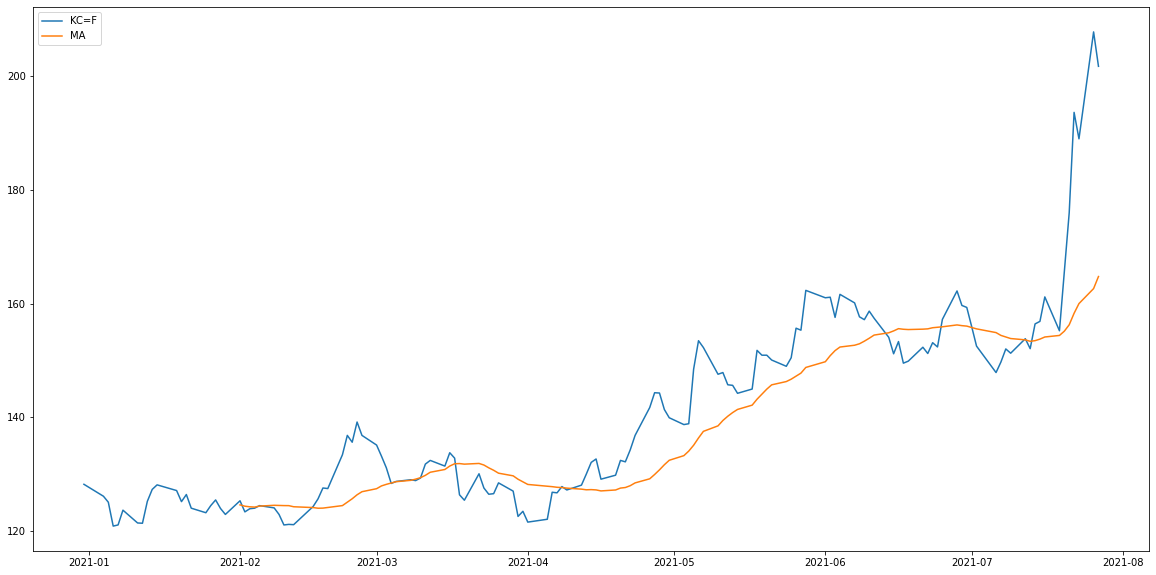

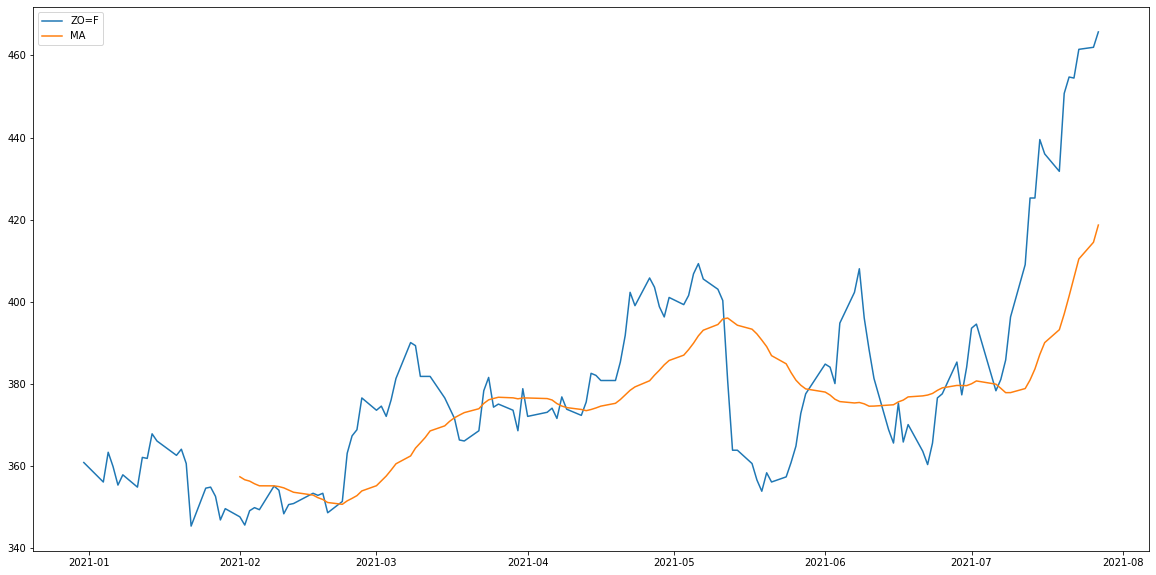

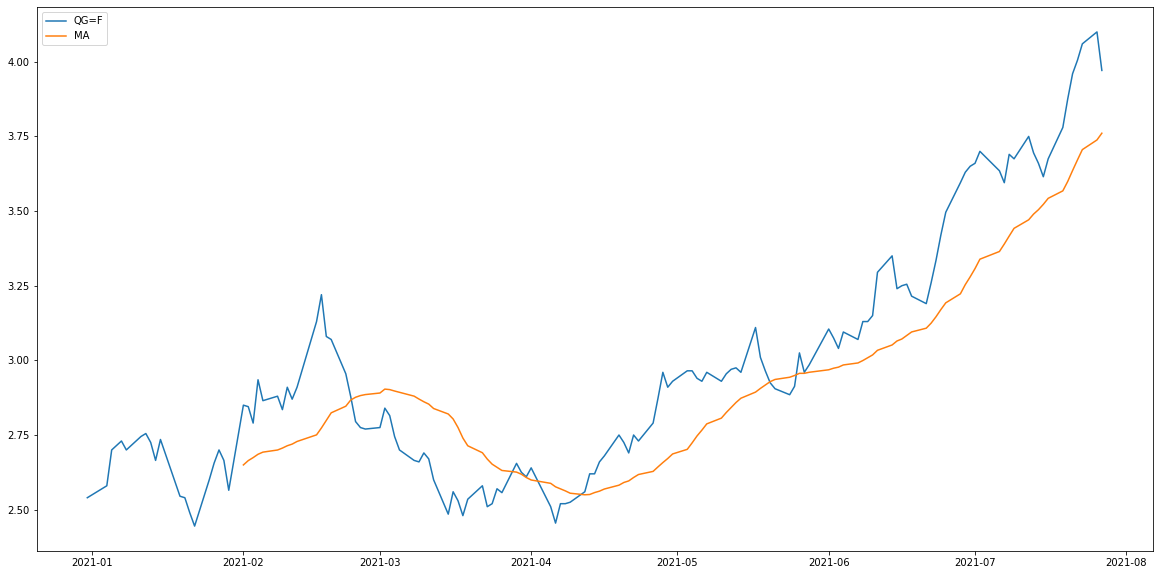

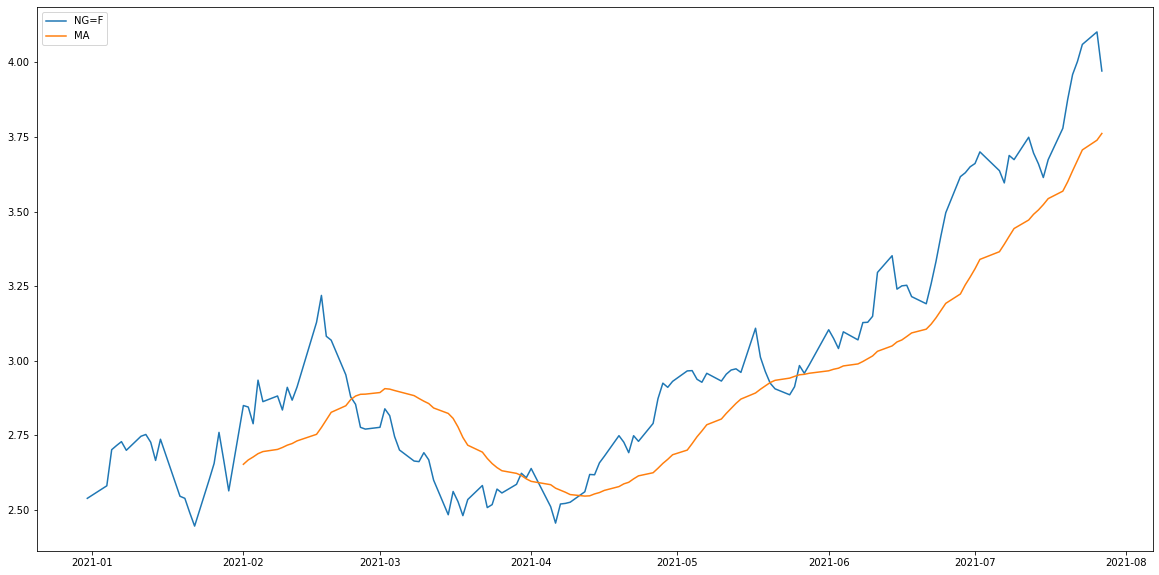

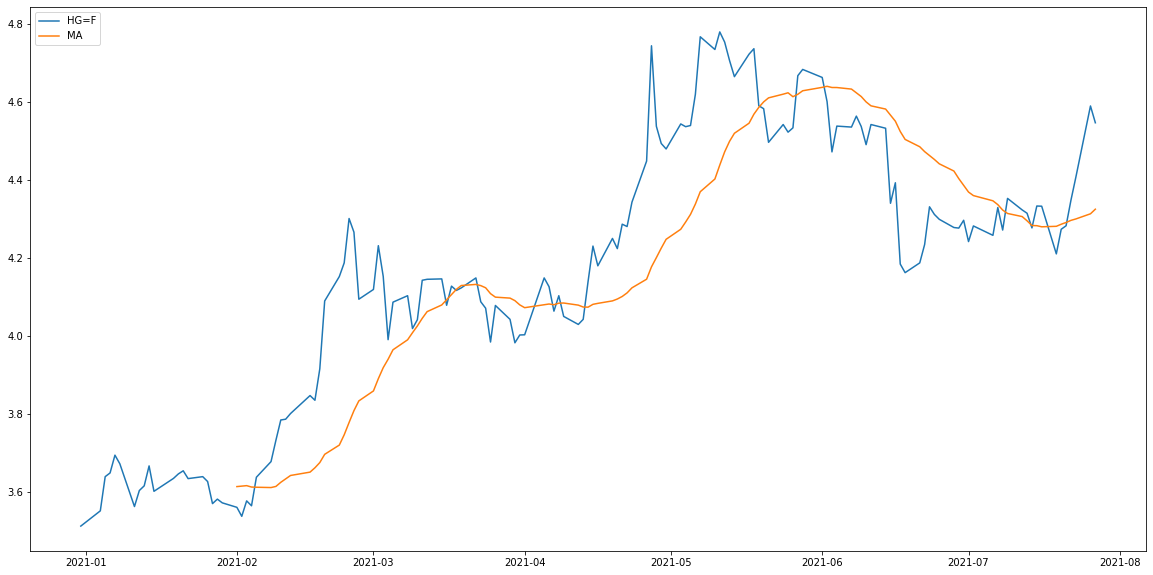

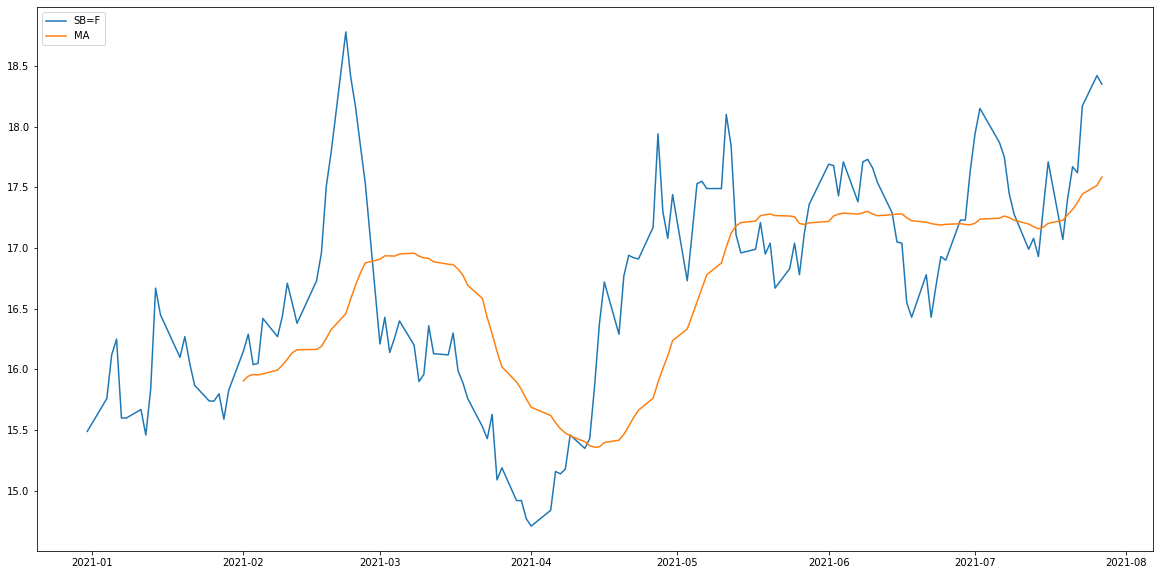

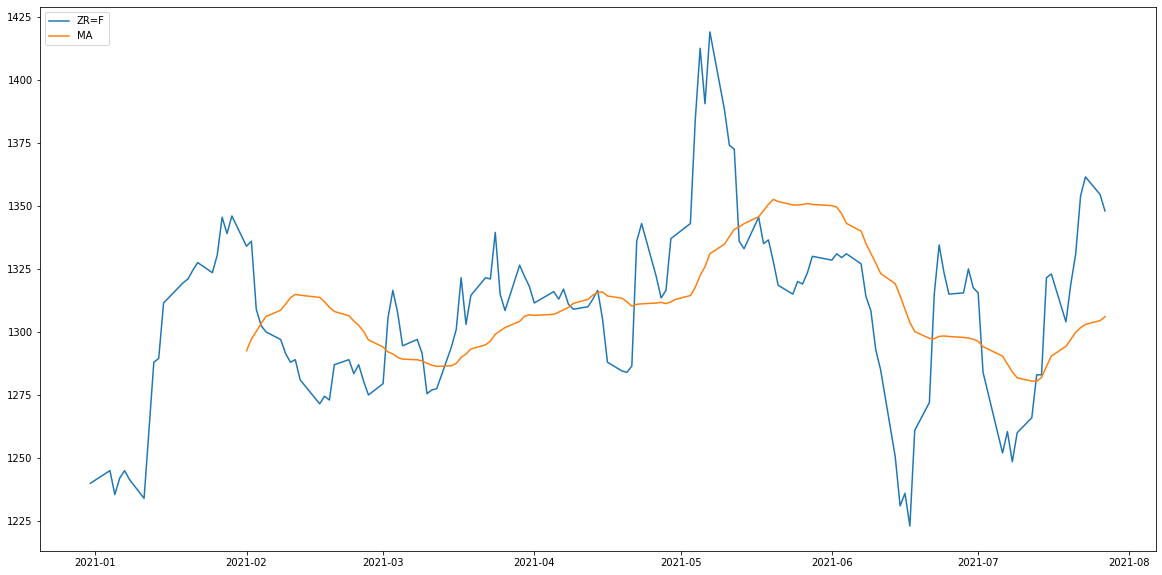

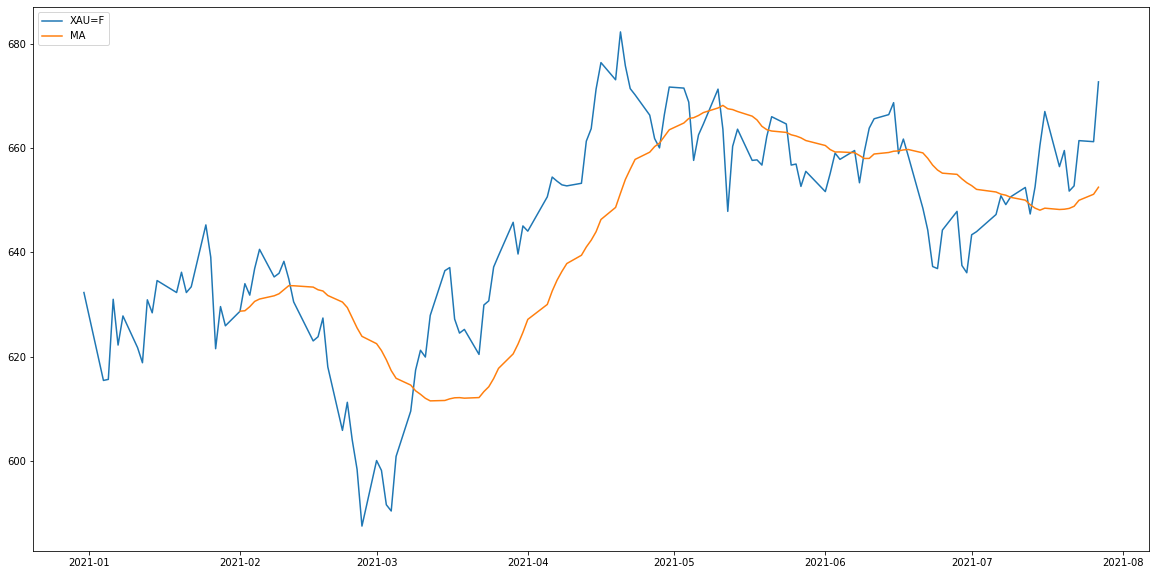

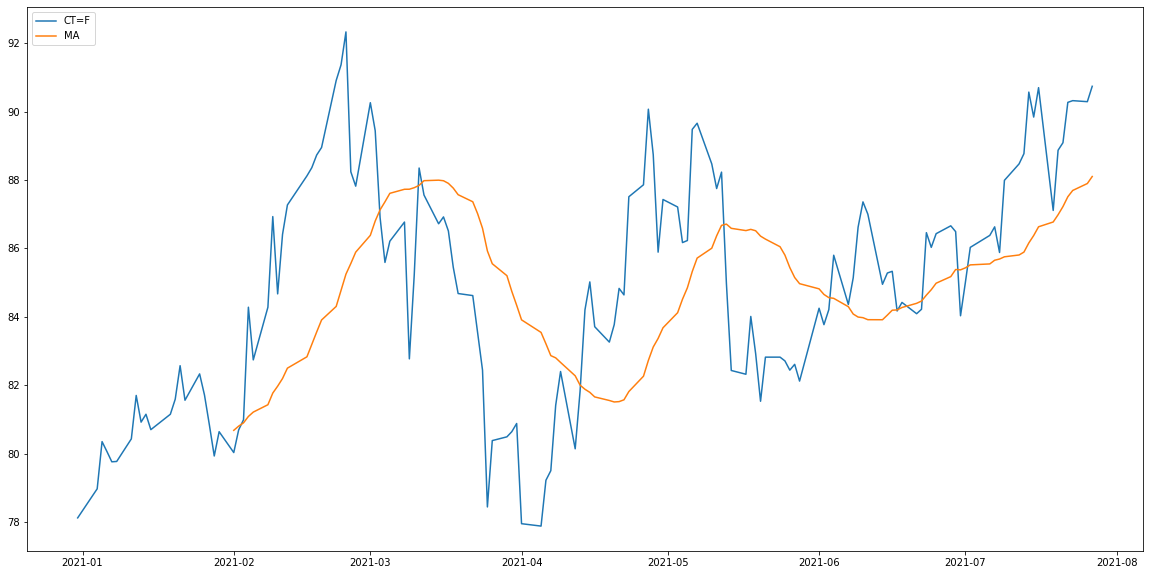

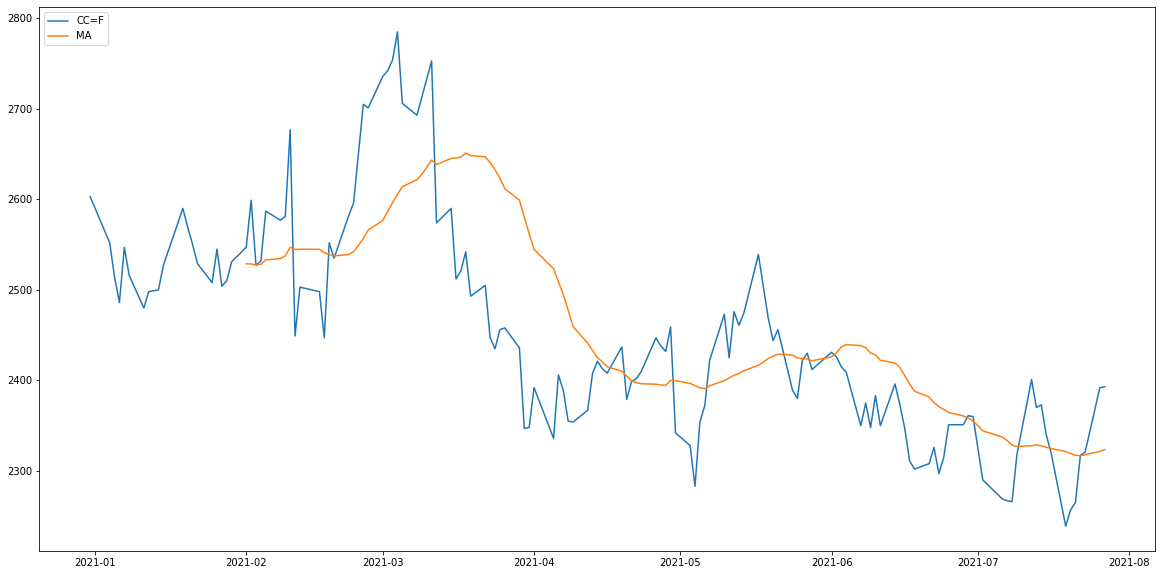

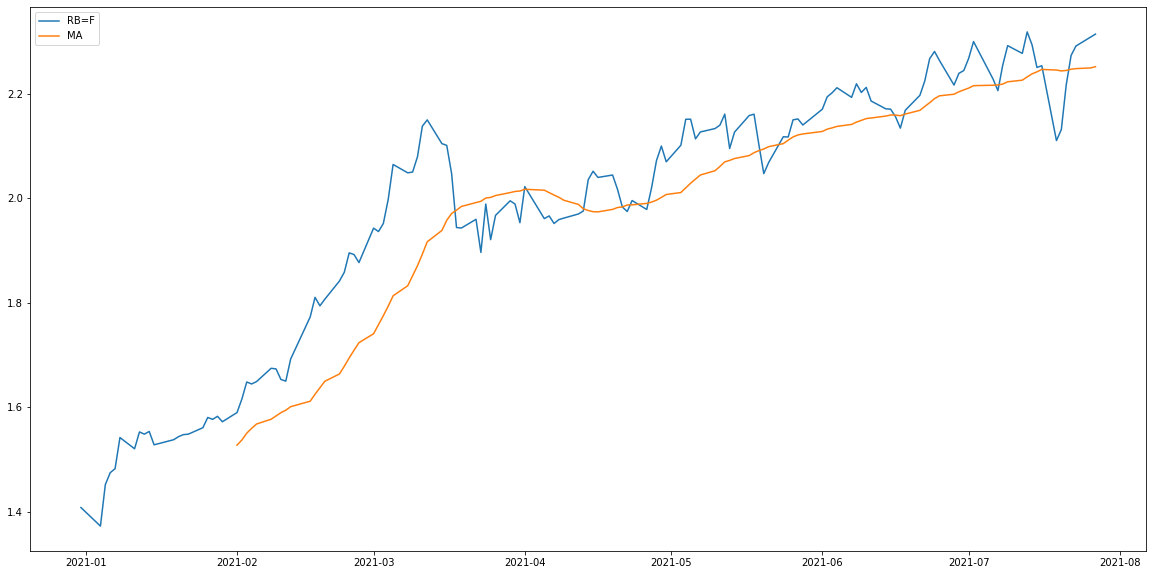

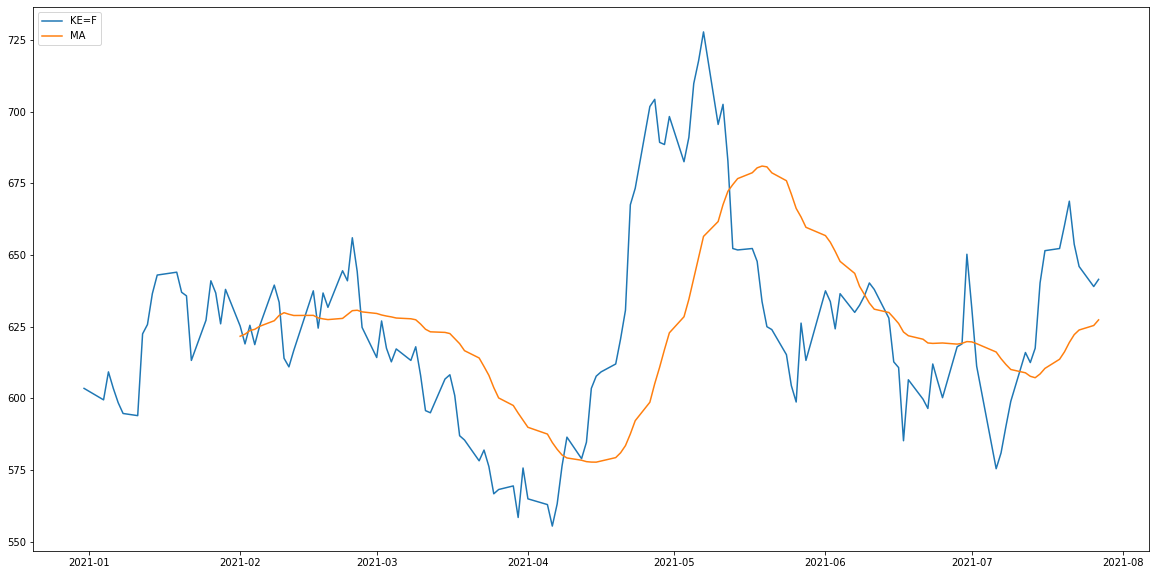

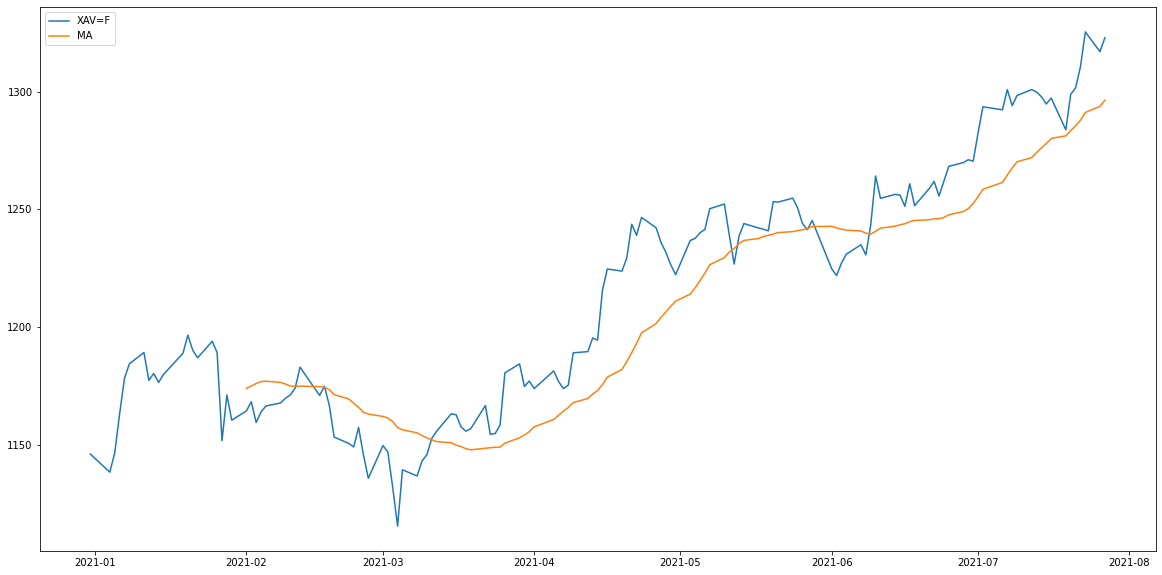

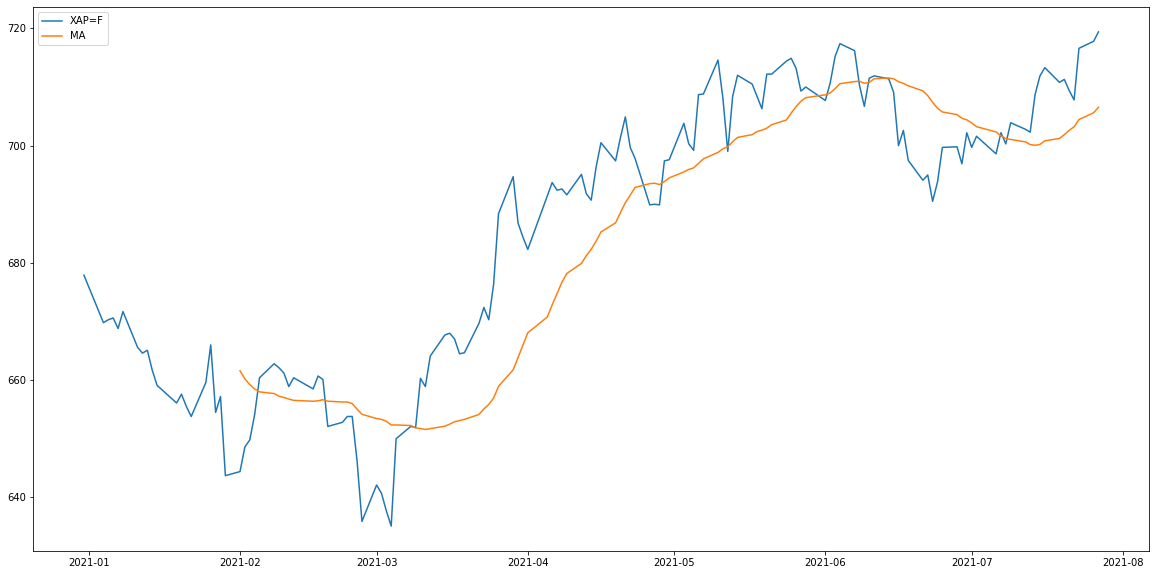

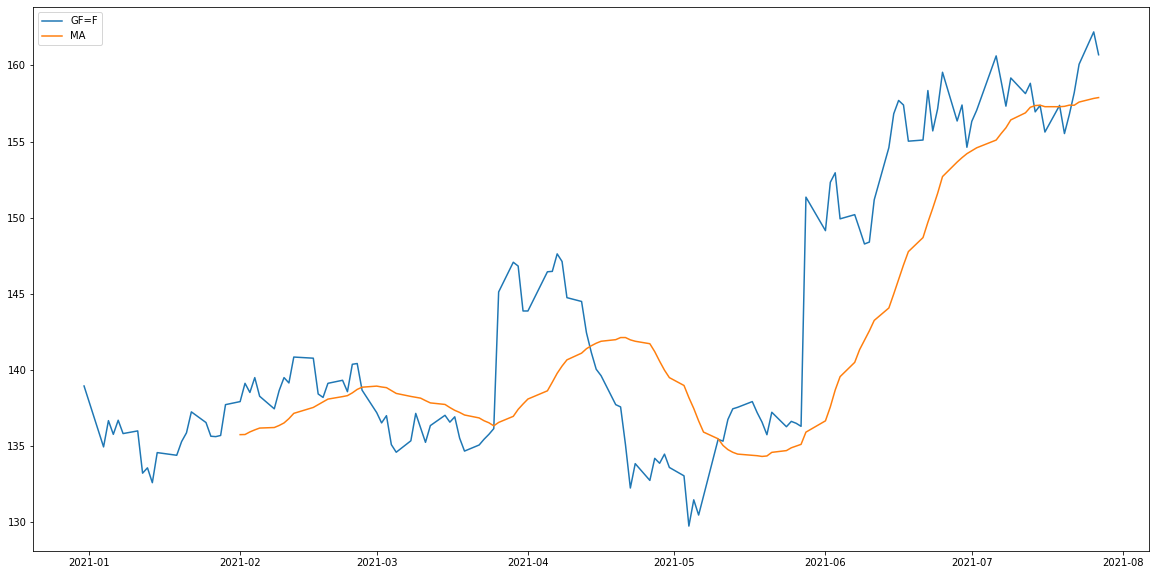

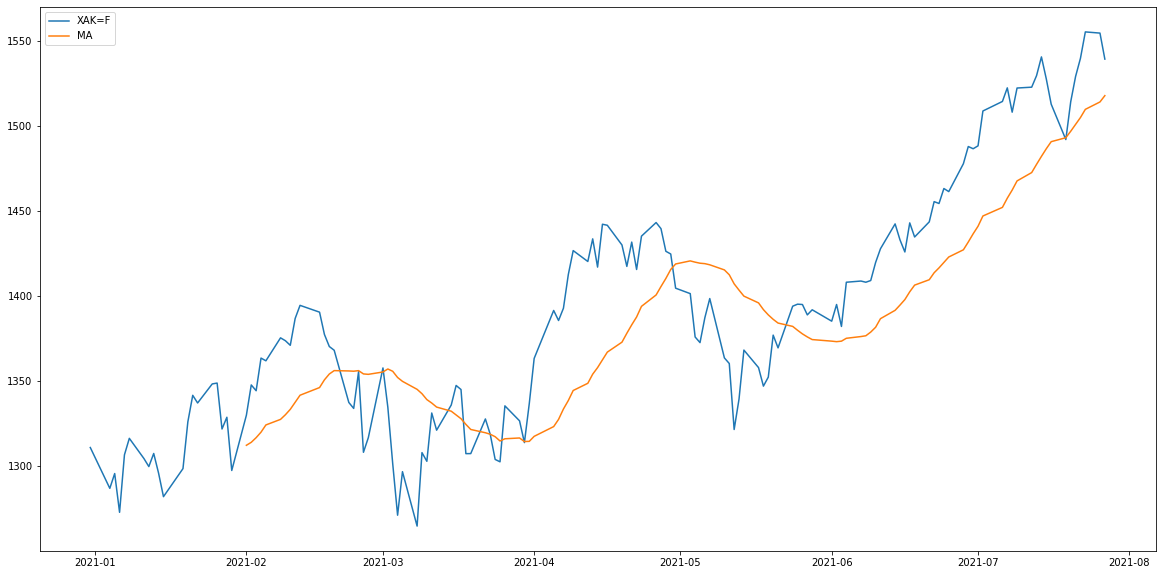

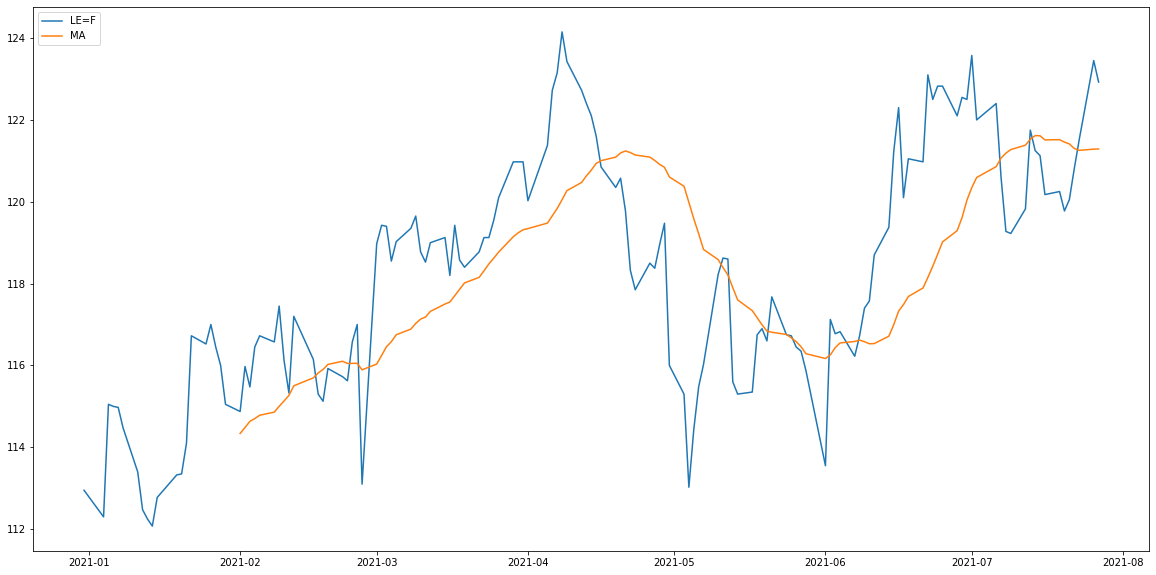

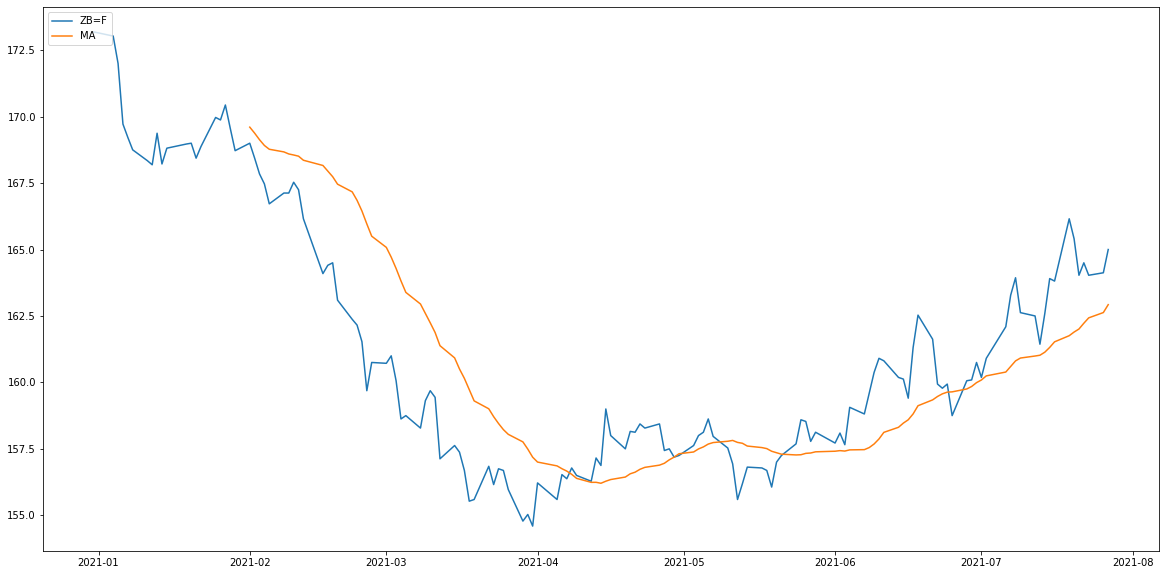

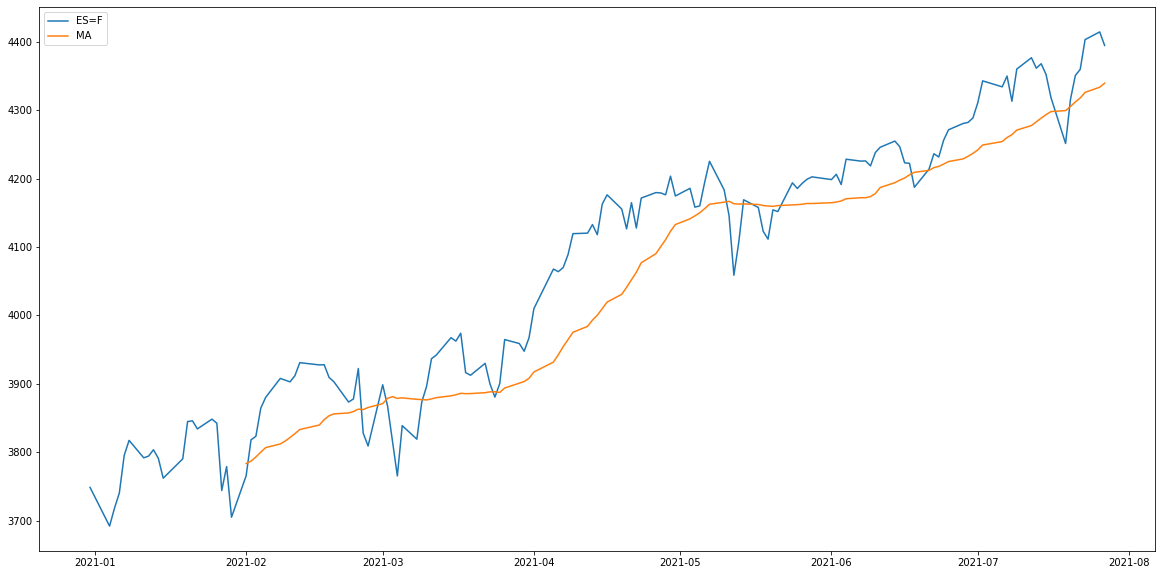

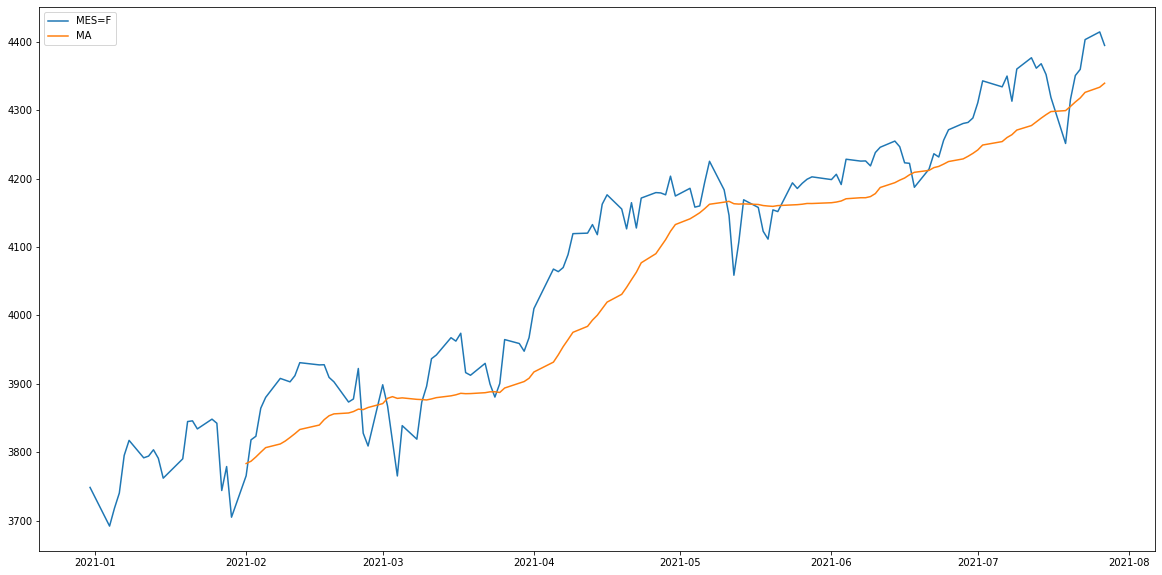

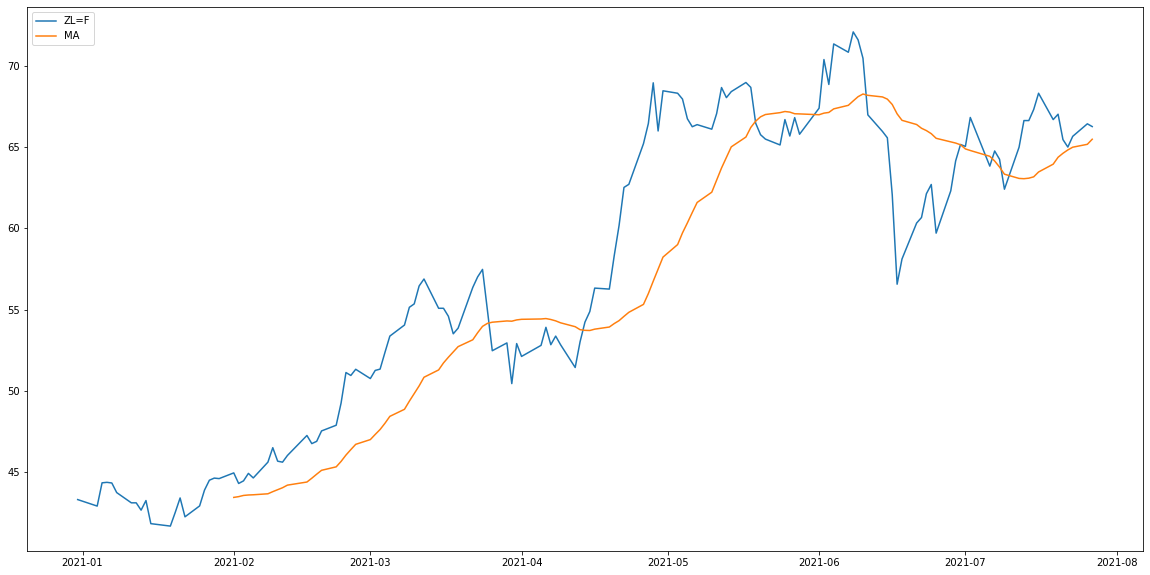

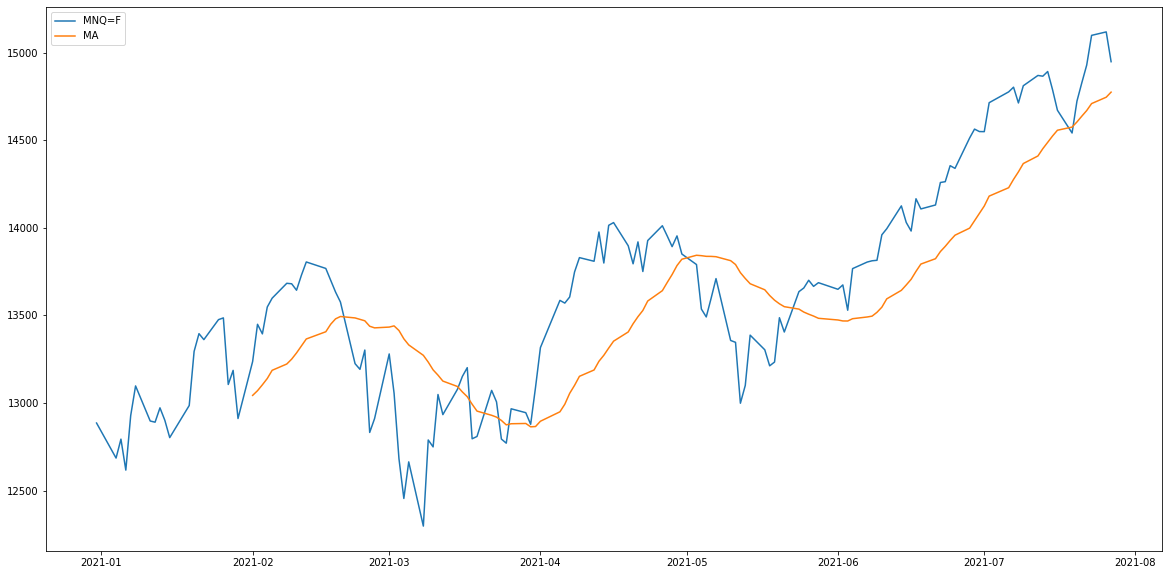

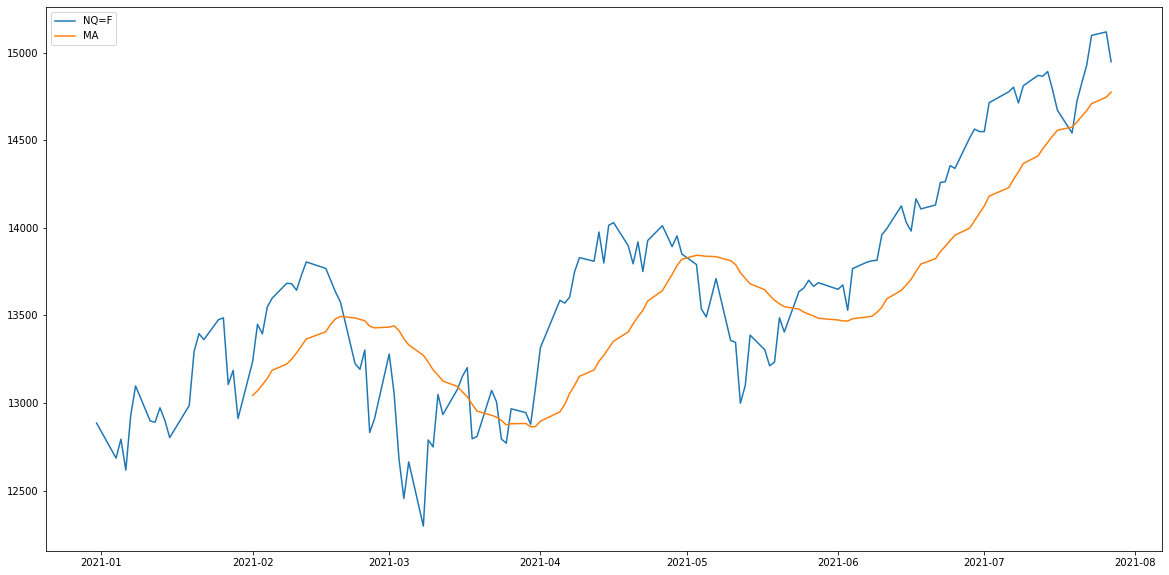

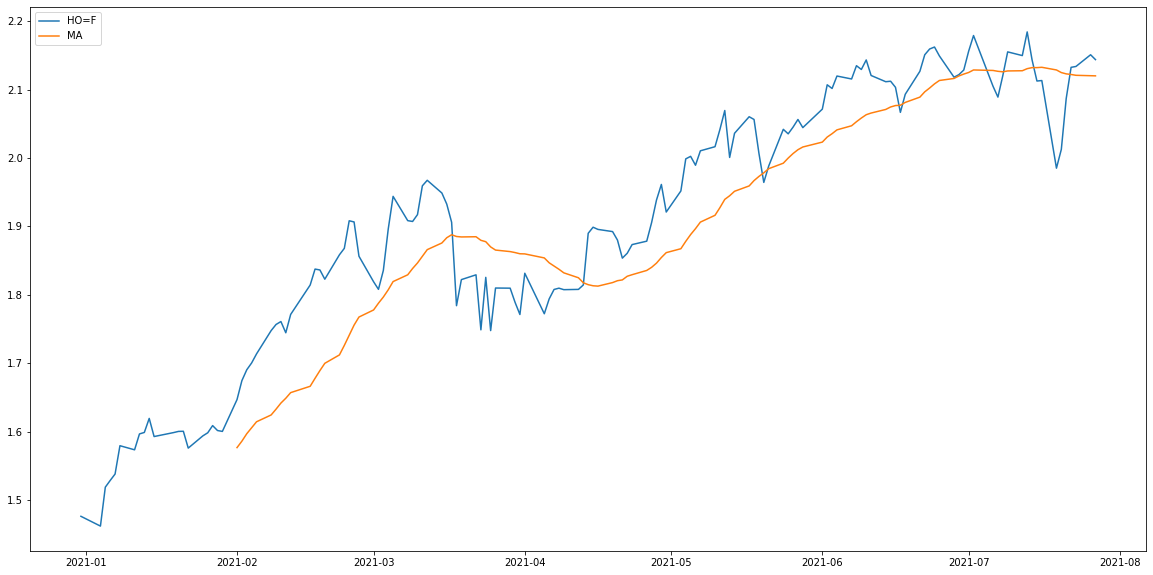

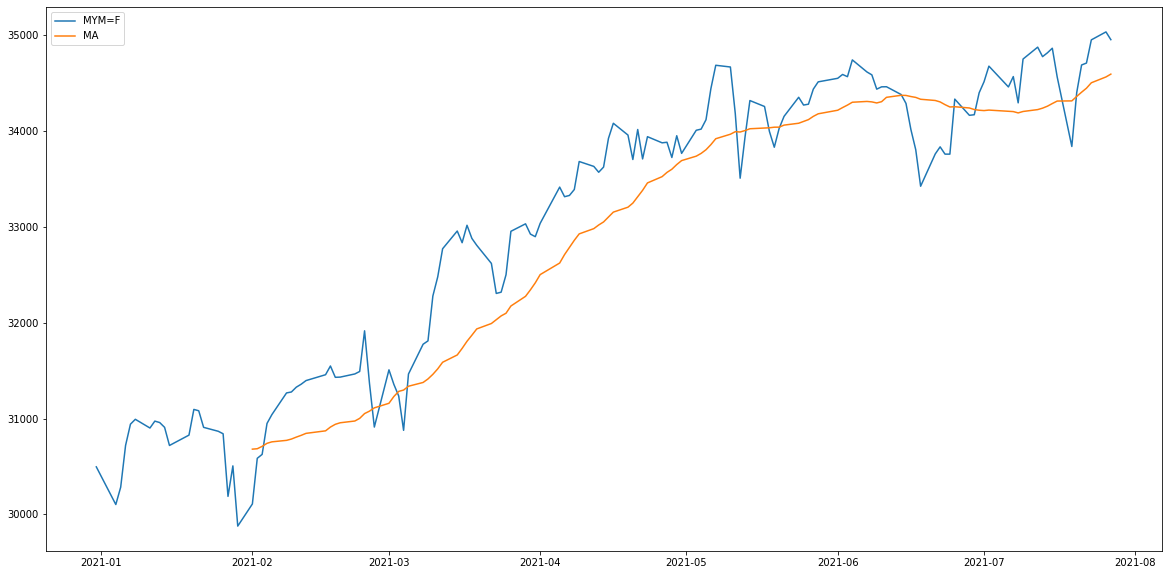

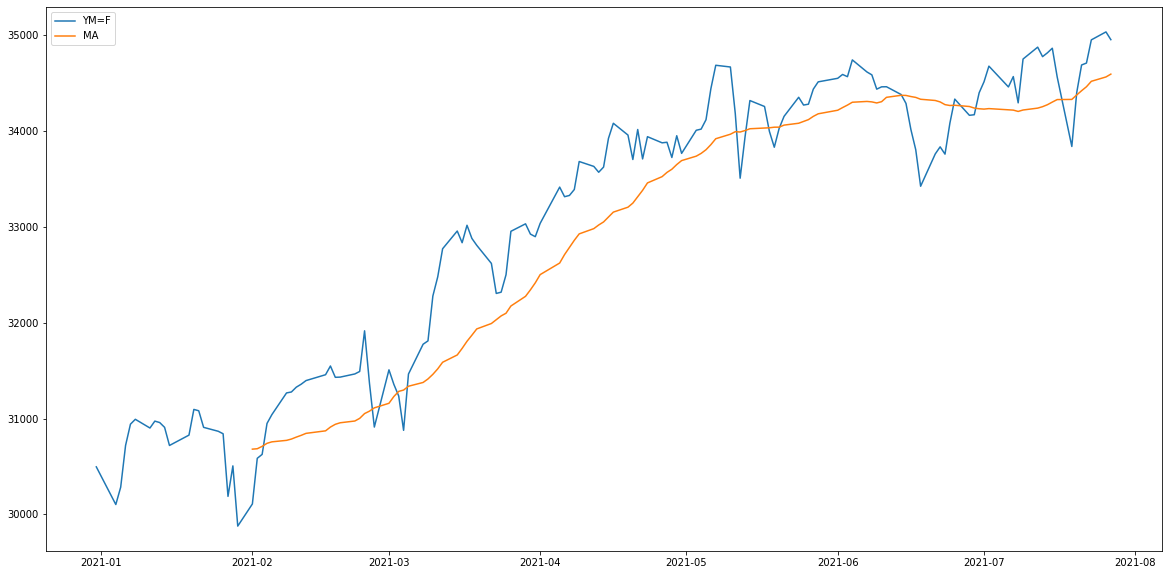

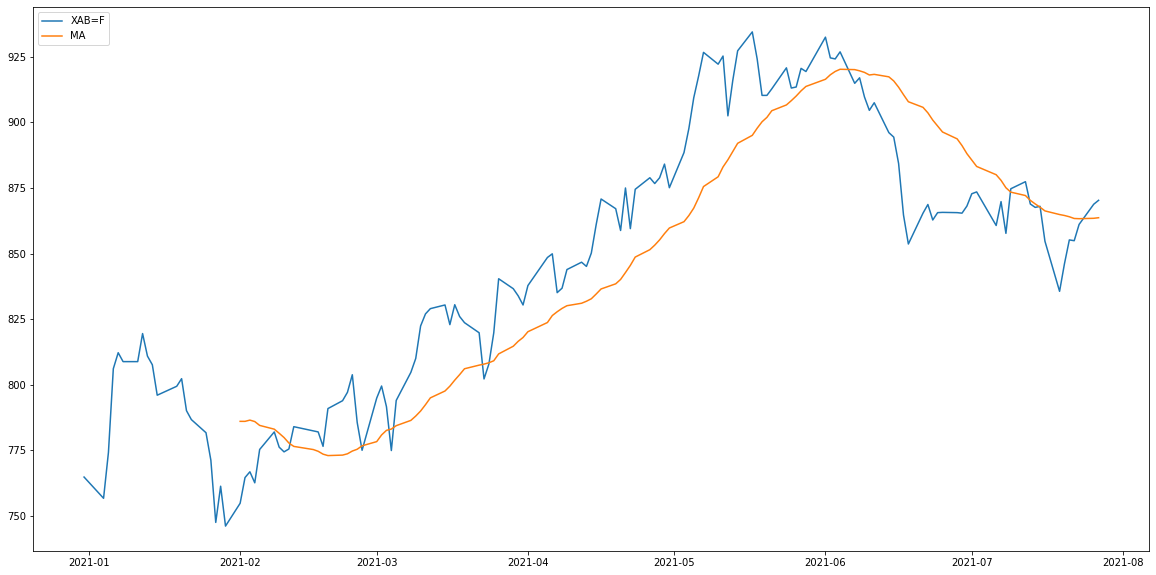

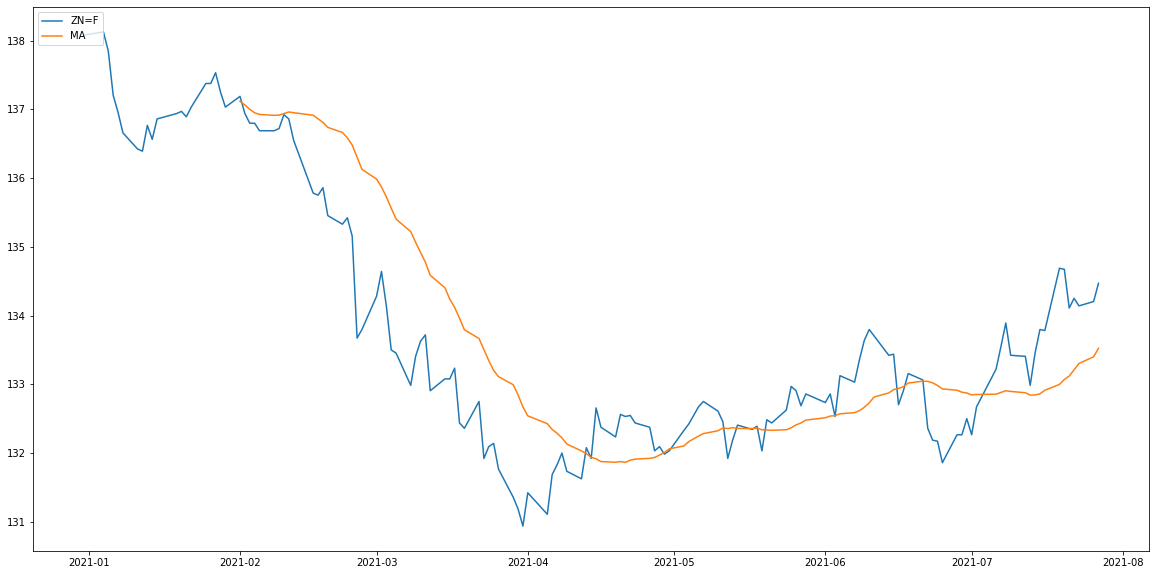

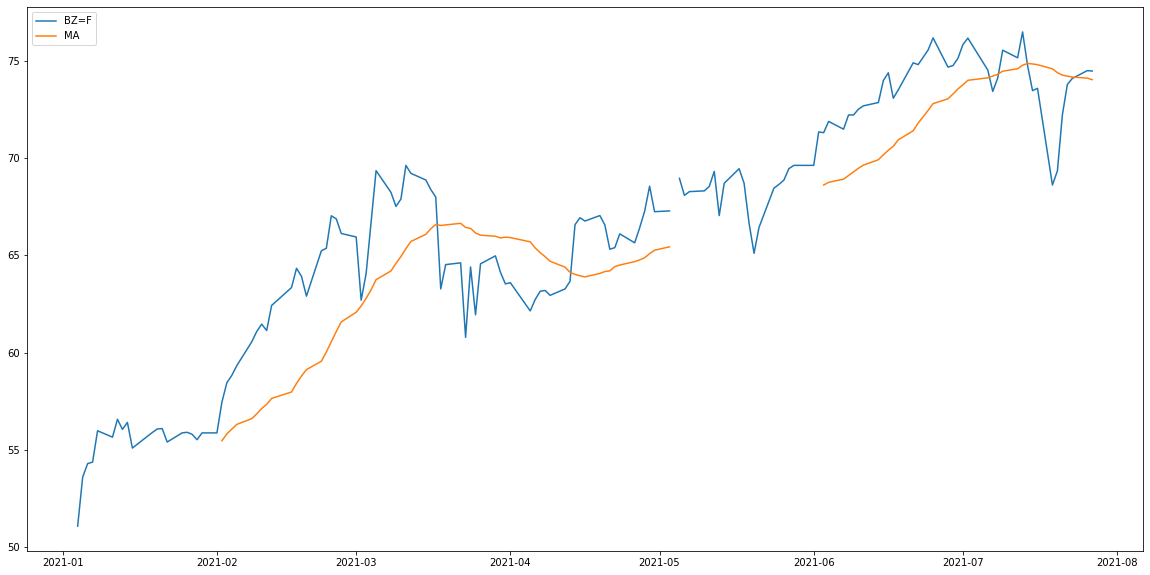

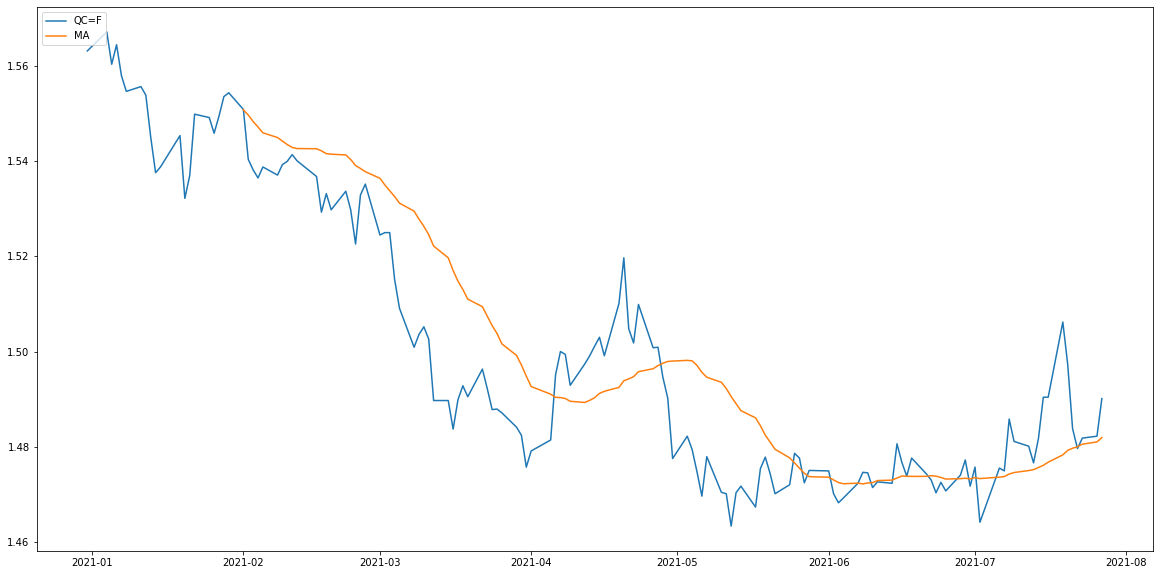

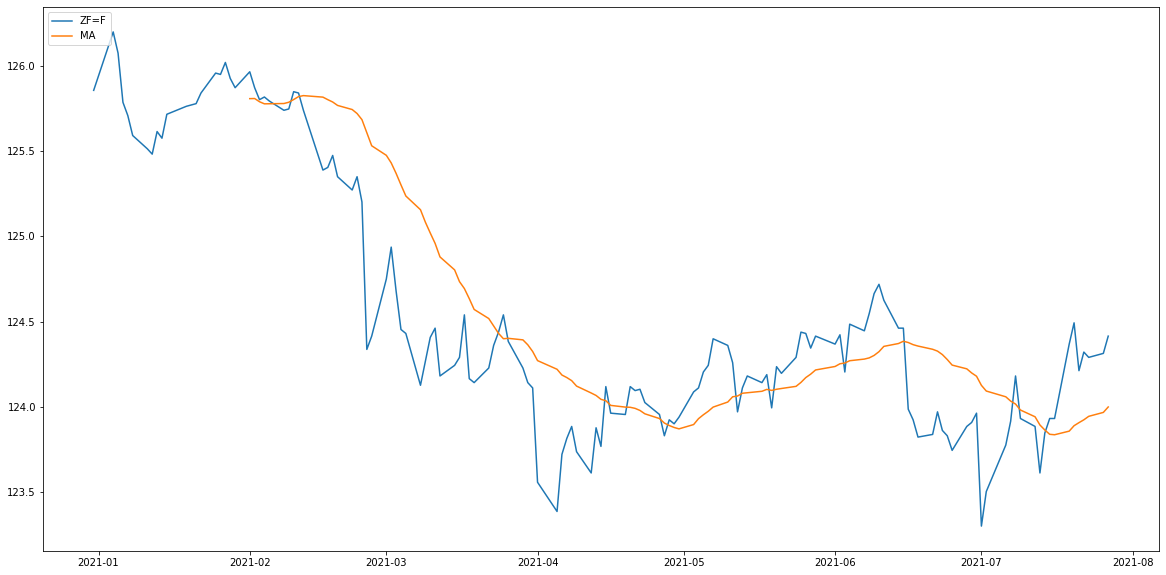

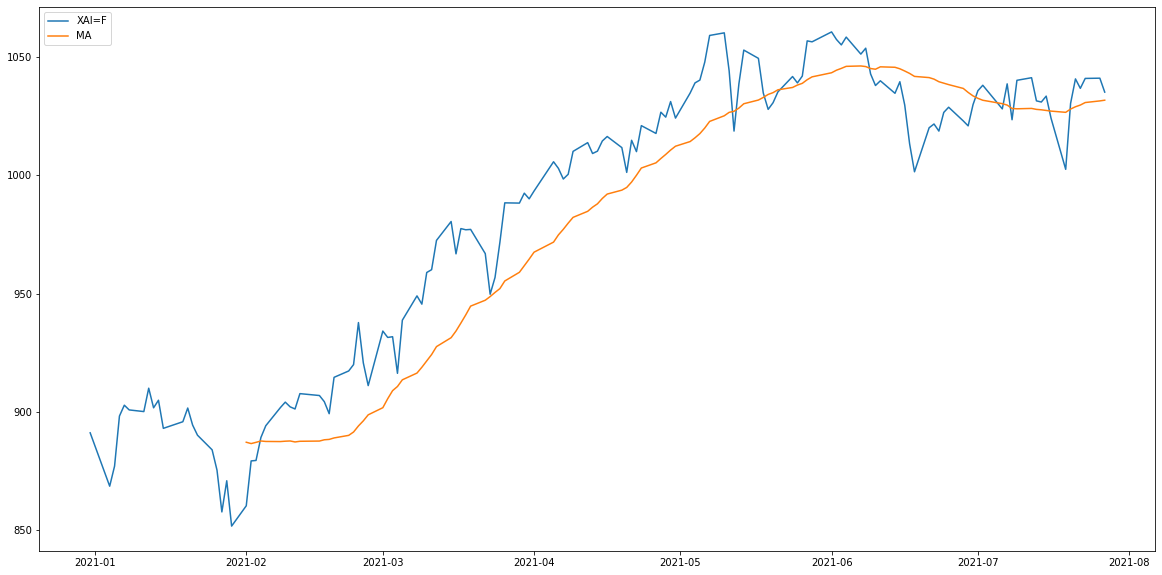

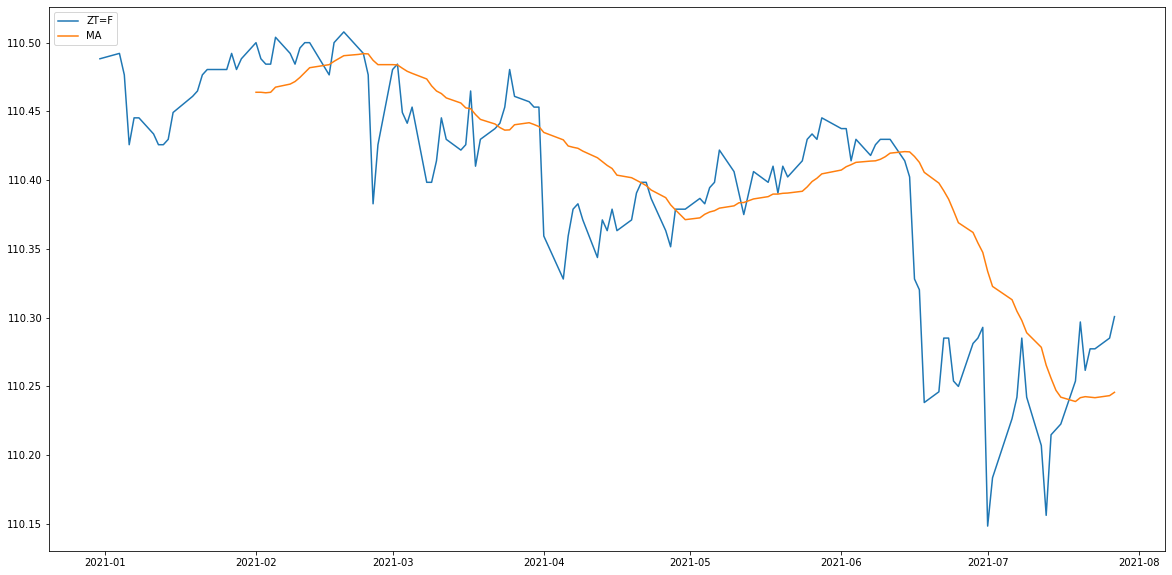

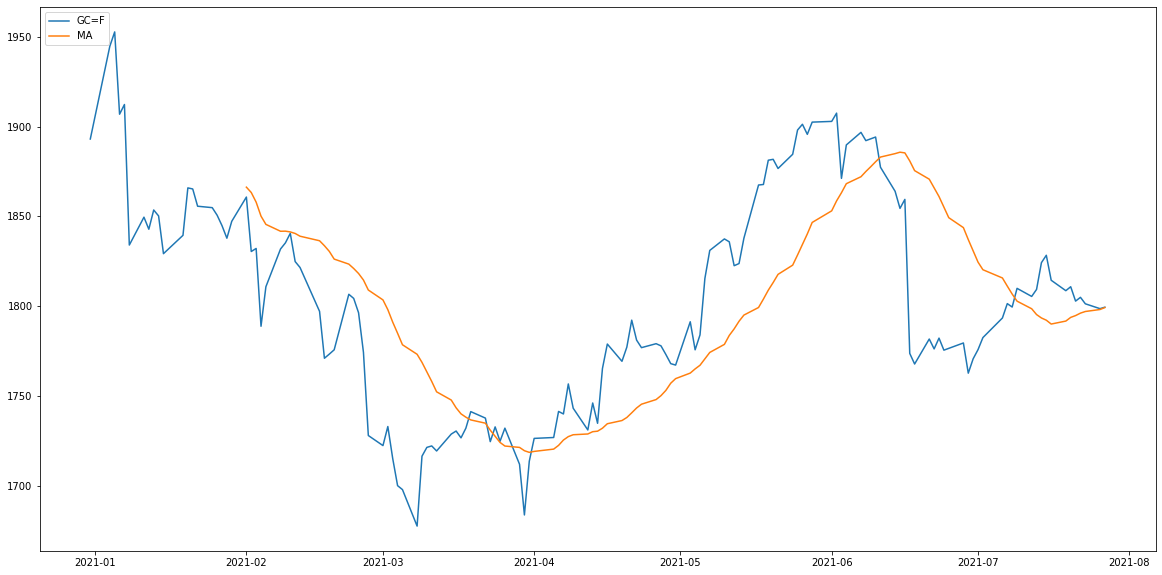

In [24]:
for quote in lead_comps:
    fig, ax = plt.subplots(figsize=(20, 10))
    plt.plot(data[quote], label=quote);
    plt.plot(ma[quote], label = 'MA');
    plt.legend(loc=2);